In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
cap_5 = pd.read_csv('capacity_B0005.csv')
cap_6 = pd.read_csv('capacity_B0006.csv')
cap_7 = pd.read_csv('capacity_B0007.csv')
cap_18 = pd.read_csv('capacity_B0018.csv')

In [3]:
cap_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           168 non-null    int64  
 1   cycle                168 non-null    int64  
 2   ambient_temperature  168 non-null    int64  
 3   datetime             168 non-null    object 
 4   capacity             168 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.7+ KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_10848\3544547659.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['RUL'][df['RUL'] < 0] = 0 # Đảm bảo RUL không âm
C:\Users\Admin\AppData\Local\Temp\ipykernel_10848\3544547659.py:18: Setting

Đã tính toán xong SOH và RUL cho tất cả các pin.
Đã lưu đồ thị so sánh SOH: soh_comparison.png
Đã lưu đồ thị so sánh RUL: rul_comparison.png


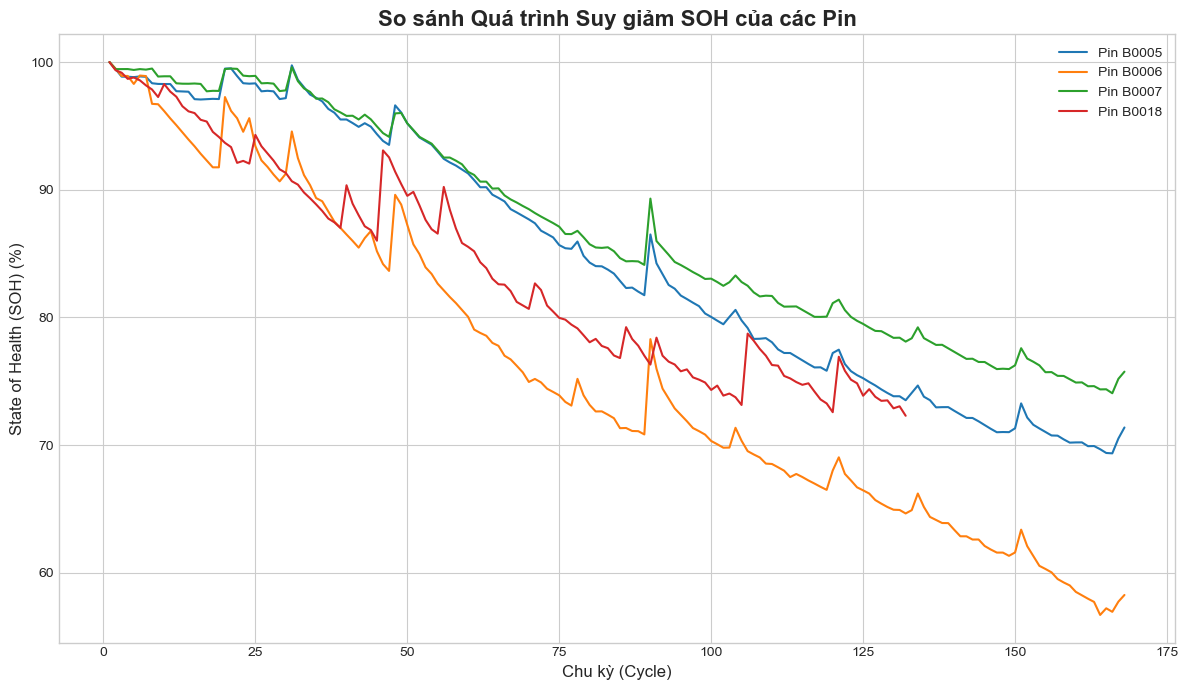

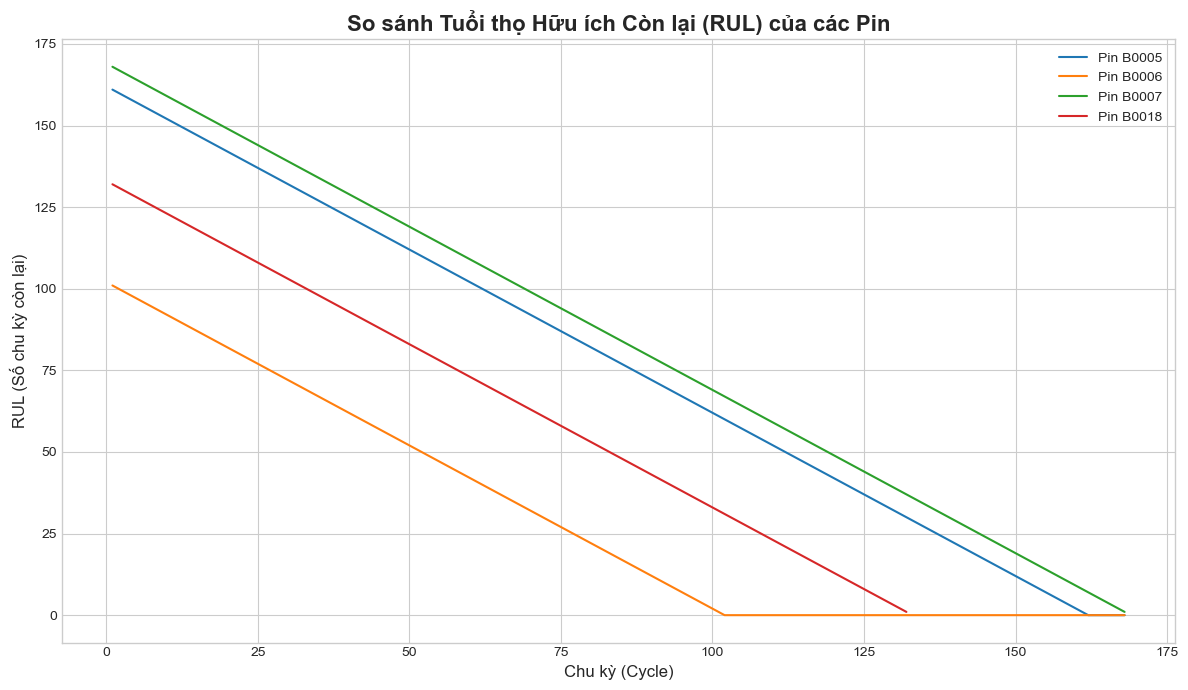

In [7]:
# Hàm để xử lý một DataFrame
def process_battery_data(df):
    # Tính SOH
    initial_capacity = df['capacity'].iloc[0]
    df['SOH'] = (df['capacity'] / initial_capacity) * 100

    # Tính RUL
    eol_capacity = initial_capacity * 0.7
    eol_cycle_df = df[df['capacity'] <= eol_capacity]
    
    if not eol_cycle_df.empty:
        eol_cycle = eol_cycle_df['cycle'].iloc[0]
    else:
        # Nếu pin chưa bao giờ đạt đến ngưỡng EOL trong dữ liệu
        eol_cycle = df['cycle'].max() + 1 
        
    df['RUL'] = eol_cycle - df['cycle']
    df['RUL'][df['RUL'] < 0] = 0 # Đảm bảo RUL không âm
    return df

# Áp dụng hàm xử lý cho mỗi pin
cap_5 = process_battery_data(cap_5)
cap_6 = process_battery_data(cap_6)
cap_7 = process_battery_data(cap_7)
cap_18 = process_battery_data(cap_18)
print("Đã tính toán xong SOH và RUL cho tất cả các pin.")

# --- BƯỚC 2: VẼ CÁC ĐỒ THỊ SO SÁNH ---
plt.style.use('seaborn-v0_8-whitegrid')

# 2.1 Đồ thị so sánh SOH
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.plot(cap_5['cycle'], cap_5['SOH'], label='Pin B0005')
ax1.plot(cap_6['cycle'], cap_6['SOH'], label='Pin B0006')
ax1.plot(cap_7['cycle'], cap_7['SOH'], label='Pin B0007')
ax1.plot(cap_18['cycle'], cap_18['SOH'], label='Pin B0018')

ax1.set_title('So sánh Quá trình Suy giảm SOH của các Pin', fontsize=16, fontweight='bold')
ax1.set_xlabel('Chu kỳ (Cycle)', fontsize=12)
ax1.set_ylabel('State of Health (SOH) (%)', fontsize=12)
ax1.legend()
ax1.grid(True)
plt.tight_layout()
plt.savefig('soh_comparison.png', dpi=300)
print("Đã lưu đồ thị so sánh SOH: soh_comparison.png")


# 2.2 Đồ thị so sánh RUL
fig2, ax2 = plt.subplots(figsize=(12, 7))
ax2.plot(cap_5['cycle'], cap_5['RUL'], label='Pin B0005')
ax2.plot(cap_6['cycle'], cap_6['RUL'], label='Pin B0006')
ax2.plot(cap_7['cycle'], cap_7['RUL'], label='Pin B0007')
ax2.plot(cap_18['cycle'], cap_18['RUL'], label='Pin B0018')

ax2.set_title('So sánh Tuổi thọ Hữu ích Còn lại (RUL) của các Pin', fontsize=16, fontweight='bold')
ax2.set_xlabel('Chu kỳ (Cycle)', fontsize=12)
ax2.set_ylabel('RUL (Số chu kỳ còn lại)', fontsize=12)
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.savefig('rul_comparison.png', dpi=300)
print("Đã lưu đồ thị so sánh RUL: rul_comparison.png")